In [1]:
import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

In [3]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

In [46]:
len(train_vectors.data)

207918

In [4]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [5]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

0.92523364485981296

In [6]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

In [7]:
print(c.predict_proba([newsgroups_test.data[0]]))

[[ 0.268  0.732]]


In [63]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [64]:
idx = 83
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=10)
print("value to be predicted")
print(newsgroups_test.data[idx])
print(newsgroups_test.target[idx])
print(newsgroups_test.target_names)

In [17]:
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

Document id: 83
Probability(christian) = 0.452
True class: atheism


In [18]:
# Explanation of the method
?explainer.explain_instance

In [20]:
# ravel is used for array flattening
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

In [22]:
import sklearn.metrics.pairwise

In [30]:
X = [[0, 1], [1, 1]]
sklearn.metrics.pairwise_distances(X, X, metric='cosine')

array([[  0.00000000e+00,   2.92893219e-01],
       [  2.92893219e-01,   2.22044605e-16]])

In [65]:
exp.as_list()
#exp.show_in_notebook(text=False)

[(u'Posting', -0.15348868108575692),
 (u'Host', -0.12702598266475415),
 (u'NNTP', -0.084969516768651984),
 (u'edu', -0.027048865720681367),
 (u'There', -0.015074758220228225),
 (u'please', -0.010440366749918037),
 (u'From', 0.010161137013837328),
 (u'post', -0.0098429350871288568),
 (u'University', 0.0087507652613533771),
 (u'Subject', 0.0068797443829860788)]

In [35]:
print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['Posting']] = 0
tmp[0,vectorizer.vocabulary_['Host']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

Original prediction: 0.452
Prediction removing some features: 0.708
Difference: 0.256


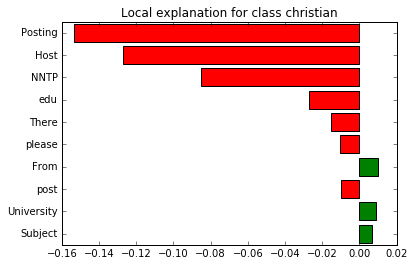

In [66]:
%matplotlib inline
fig = exp.as_pyplot_figure()

# Numeric Format

In [49]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [50]:
iris = sklearn.datasets.load_iris()

In [51]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(iris.data, iris.target, train_size=0.80)

In [52]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [53]:
sklearn.metrics.accuracy_score(labels_test, rf.predict(test))

0.96666666666666667

In [101]:
import pandas as pd
pd.DataFrame(test).head()

,0,1,2,3
0,5.8,4.0,1.2,0.2
1,5.1,2.5,3.0,1.1
2,6.6,3.0,4.4,1.4
3,5.4,3.9,1.3,0.4
4,7.9,3.8,6.4,2.0


In [115]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=iris.feature_names, 
                                                   class_names=iris.target_names, discretize_continuous=True)
i = np.random.randint(0, test.shape[0])
exp_num = explainer.explain_instance(test[i], rf.predict_proba, num_features=4, top_labels=1)

In [103]:
exp_num.predict_proba

array([ 0.008,  0.982,  0.01 ])

In [104]:
exp_num.class_names

['setosa', 'versicolor', 'virginica']

In [116]:
exp_num.as_list()

[('4.35 < petal length (cm) <= 5.12', 0.1343901599517556),
 ('1.30 < petal width (cm) <= 1.80', 0.13178251780129646),
 ('3.00 < sepal width (cm) <= 3.30', 0.023437617516554696),
 ('5.80 < sepal length (cm) <= 6.40', 0.0088209915536043154)]